In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
from PIL import Image



In [2]:
#vamos a cargar los archivos
root_folder = "Z:/DAS/2021-11-30_Medidas"

#list all .mat files in the folder
import glob
files = glob.glob(root_folder + "/*.mat")
print(files)

#load all files
import scipy.io
data = [scipy.io.loadmat(file) for file in files]

['Z:/DAS/2021-11-30_Medidas\\medida_211130_11_55_19.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_00_18.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_05_19.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_10_25.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_15_43.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_20_33.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_25_22.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_31_59.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_36_52.mat']


In [3]:
#concat al Fp
Fp = np.concatenate([d['Fp'] for d in data])

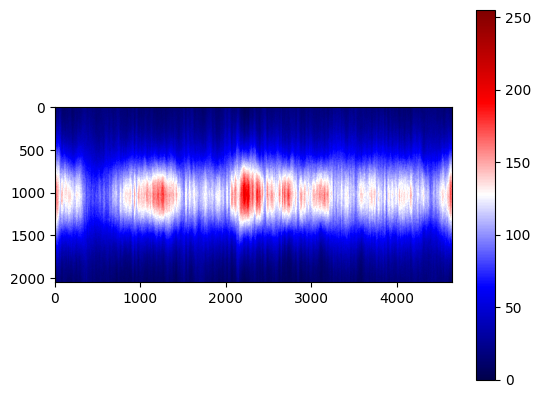

In [4]:
#compute transpose
Fpt = Fp.T
#get max value of Fp transpose
#df['max'] = np.max(Fpt, axis=1)
#get min value of Fp transpose
#df['min'] = np.min(Fpt, axis=1)

#the height of image will be the number of buckets
height = 100
#the width of image will be the number of samples
width = Fp.shape[1]

data = Fp
histograms = []
for i in range(data.shape[1]):
    hist, _ = np.histogram(data[:, i], bins=2048, range=(-.04, .04))
    histograms.append(hist)




normalized_histograms = np.array(histograms) / np.max(histograms)

gray_image = (normalized_histograms * 255).astype(np.uint8)
#scale the height of the image by 4
gray_image = np.repeat(gray_image, 4, axis=0)


cmap = plt.get_cmap('seismic')
plt.imshow(gray_image.T, cmap)
plt.colorbar()
plt.show()
#print(gray_image)
#save image
plt.imsave('histogram.png', gray_image.T, cmap=cmap)




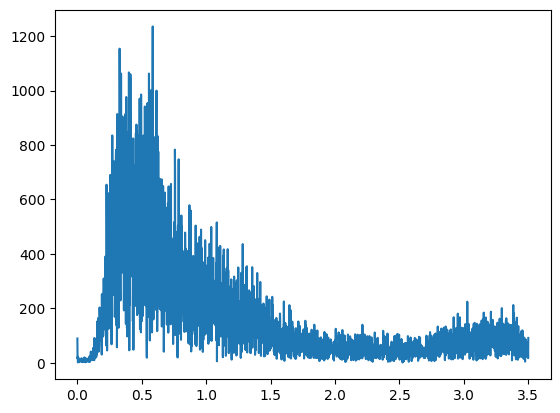

In [5]:
signal = Fpt[801,:]
#t of signal at 200hz
t = np.arange(0, len(signal) / 200, 1 / 200)
# Calcula la Transformada de Fourier rápida (FFT)
fft = np.fft.fft(signal)

# Calcula las frecuencias correspondientes
freqs = np.fft.fftfreq(len(signal), t[1] - t[0])

# Selecciona solo las frecuencias positivas
mask = freqs >= 0
freqs = freqs[mask]
fft = fft[mask]
#selecciona las frecuencias menores a 3.5
mask = freqs <= 3.5
freqs = freqs[mask]
fft = fft[mask]

#plot fft
plt.plot(freqs, np.abs(fft))






# Visualiza la señal en el tiempo y en el dominio de la frecuencia
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# ax1.plot(t, signal)
# ax1.set_title('Señal en el tiempo')
# ax1.set_xlabel('Tiempo (s)')
# ax1.set_ylabel('Amplitud')

# ax2.plot(freqs, np.abs(fft))
# ax2.set_title('Señal en el dominio de la frecuencia')
# ax2.set_xlabel('Frecuencia (Hz)')
# ax2.set_ylabel('Magnitud')
# ax2.set_xlim(0, 3.5)  # Limita el rango de frecuencias para visualizar mejor el gráfico

# plt.tight_layout()
# plt.show()




In [17]:
#create array
final = None

#image = np.zeros((height, width))
#foreach Fpt shape 0
for i in range(Fpt.shape[0]):
    signal = Fpt[i,:]
    #t of signal at 200hz
    t = np.arange(0, len(signal) / 200, 1 / 200)
    # Calcula la Transformada de Fourier rápida (FFT)
    fft = np.fft.fft(signal)

    # Calcula las frecuencias correspondientes
    freqs = np.fft.fftfreq(len(signal), t[1] - t[0])

    # Selecciona solo las frecuencias positivas
    mask = freqs >= 0
    freqs = freqs[mask]
    fft = fft[mask]
    #selecciona las frecuencias menores a 3.5
    mask = freqs <= 3.5
    freqs = freqs[mask]
    fft = fft[mask]

    if final is None:
        final = fft
        final = np.reshape(final, (1, final.shape[0]))
    else:
        final = np.vstack((final, fft))
    
print(final.shape)


(1160, 2521)


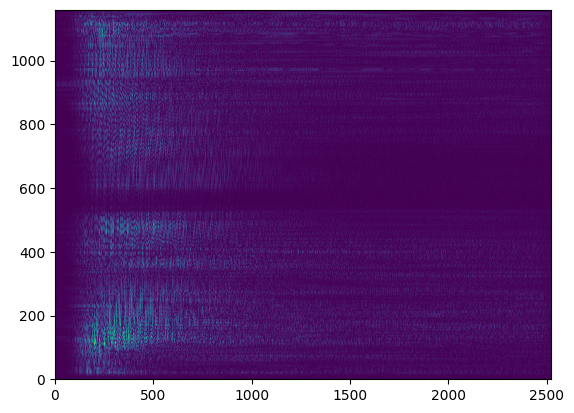

In [24]:
#magnitude of final
magfinal = np.abs(final)
#normalize final
nmagfinal = magfinal / np.max(magfinal)
#save png
Fp16 = (nmagfinal*65535).astype(np.uint16)
img = Image.fromarray(Fp16, mode='I;16')
img.save('frequencies.png')

#plot final as pcolormesh
plt.pcolormesh(Fp16)
plt.show()